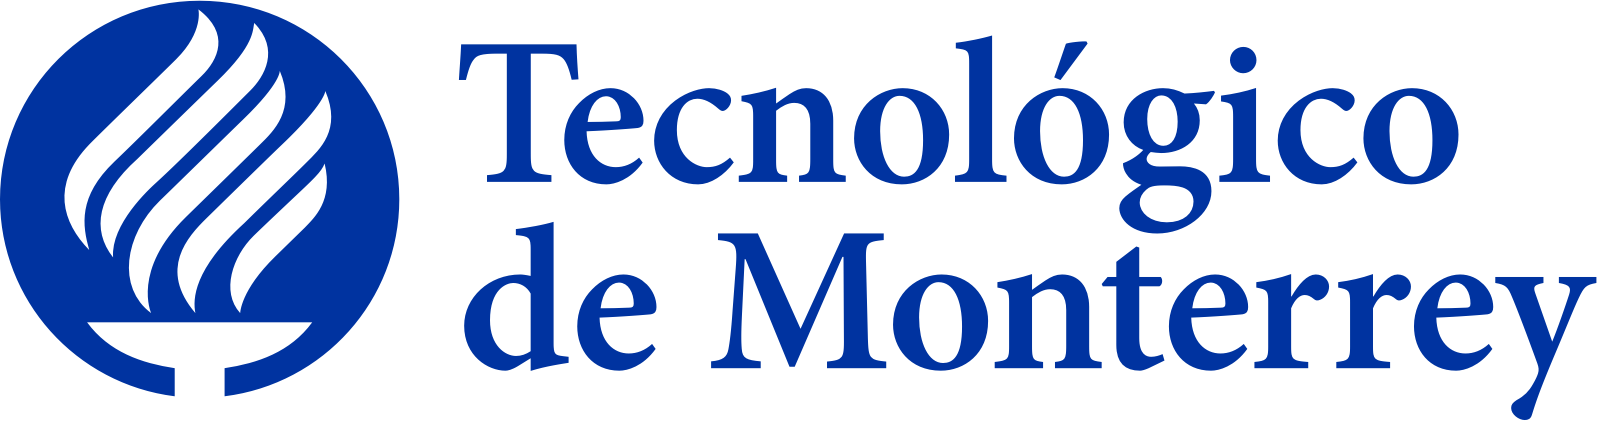


**José Juan Suárez Ramos**<br>
**A01224078**<br>
 **Proyecto Final de Aprendizaje Automático
30 de Noviembre 2020**

# a) Introducción

El siguiente trabajo representa el análisis de la base de datos de Kickstarted para lograr predecir si un projecto pueda lograr el objetivo monetario que se haya propuesto. 

Kickstarted es la plataforma más grande de "crowdfunding" donde nuevos projectos tienen la oportunidad de ofrecer productos o servicios que todavía no se llevan a cabo y obteniendo como inversionistas a los usuarios de esa plataforma, conocidos como backers. La finalidad de Kickstarted es ayudar a nuevos emprendimientos conseguir inversión a tráves de masa de usuarios. 

Los modelos tienen como objetivo pronosticar si un proyecto llegará o no al monto objetivo. Por lo que el objetivo a resolver de dichos modelos será de clasificación. 




In [76]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier as dtc
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import sklearn.model_selection as model_selection
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

encoder = preprocessing.LabelEncoder()

In [77]:

from scipy import stats

from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv("/content/drive/MyDrive/ks-projects-201801.csv")


# b) Variables

Como variable de entrada tomaremos en cuenta las siguientes para el análisis que se llevará a cabo.

## Variables de Entrada


*   **usd_goal_real (numérica USD)** => El objectivo en dólares que quiere alcanzar el proyecto
*   **name** (categórica) => Nombre del proyecto
*  ** Category** (categórica)
*   **Main Category** (categórica) => Categoría principal del proyecto.
*   **Currency** (categórica) => Abreviación de la moneda
*   **Deadline** (Fecha) => Fecha de finalidad de proyecto. Es una fecha límite para recabar el objetivo monetario.
*   **Goal** (numérica) => Valor del objetivo sobre la moneda del proyecto. El goal puede estar en libras, usd, yen, etc. 
*   **Launched** (fecha) => Fecha en la que se lanzó la campaña.
*   **Pledged** (numérica)=> Monto que se logró recabar en la moneda nativa. Si es libras, este valor está en libras.
*   **state** (categórica) => Estado del proyecto, puede ser "successfull", "failed", "other". Indica si el proyecto tuvo éxito o no y otro en caso de que estuviera actualmente corriento o por otros factores. 
*   **Backers** (numérica) => Número de personas que invirtieron y apoyaron al proyecto económicamente.
*   **Country** (categórica) => Código del país de donde es el proyecto.
*  **Usd Goal Real** (numérica)=> Monto de el objetivo (goal) en dólares americanos. 

## Variables de Salida

*  **Usd pledged Real** (numérica)=> Monto recabo real en dólares 














In [79]:
data.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [80]:
data.shape

(378661, 15)

# C y D) Transformación y análisis de Datos  

Al ver los datos podemos notar que muchas de las categorías están en texto y que tenemos como variable de salida usd_goal_real. 

## Transformación de variables categóricas

Al ser un problema de clasificación, sabemos que lo ideal es manejar los datos cateróricos con una transformación numérica utilizando un label encoder, lo que nos permitirá transformar las siguientes variables a datos numéricos, lo que ayudará a nuestros modelos de clasificación.



*   **name** (categórica)
*  ** Category** (categórica)
*   **Main Category** (categórica) 
*   **Currency** (categórica) 
*   **Goal** (numérica) 
*   **state** (categórica) 
*   **Country** (categórica) 

## Transformación de fechas

las fechas tienen que ser transformadas a un valor numérico. Por lo que podemos usar 

*   **Deadline** (Fecha) 
*   **Launched** (fecha)

## Transformación de Variable de Salida

Nuestra variable independiente tiene que ser transformada a un valor binario para que de esa forma nuestros modelos puedan predicir si el proyecto logrará conseguir el monto objetivo o no. 

Por lo que llevaremos a cabo una tranformación booleana donde nuestra variable de salida cambiará a "goal_reach":

*   **goal_reached** (bool) => será nuestra nueva variable de salida, se calculará considerando que  **Usd Pledged Real** sea mayor o igual a  **Usd Goal Real**, con eso tendremos valores 1s y 0s.



In [81]:
data.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [82]:
# Transformación de Datos

data["name"] = encoder.fit_transform(data['name'].astype(str))
data["main_category"] = encoder.fit_transform(data["main_category"].astype(str))
data["currency"] = encoder.fit_transform(data["currency"].astype(str))
data["state"] = encoder.fit_transform(data["state"].astype(str))
data["category"] = encoder.fit_transform(data["category"].astype(str))
data["country"] = encoder.fit_transform(data["country"].astype(str))
data["goal"] = minmax_scaling(data["goal"], columns = [0])
data['deadline'] = pd.to_datetime(data['deadline'])
data["goal_reached"] = data["usd_pledged_real"] >= data["usd_goal_real"] # Nuestra nueva variable de salida
data["usd_goal_real"] = stats.boxcox(data["usd_goal_real"])[0]
data["goal_reached"] = encoder.fit_transform(data["goal_reached"].astype(bool))
data['deadline']= data['deadline'].map(dt.datetime.toordinal)
data['launched'] = pd.to_datetime(data['launched'])
data['launched']= data['launched'].map(dt.datetime.toordinal)

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


# Resultados de Transformación

Podemos ver que al llevar a cabo esta transformación podemos tener los valores numéricos correctos. Se llevo a cabo una normalización de la variable usd_goal_real ya que sus valores tienen una alta variación y esto nos permitirá detectar e eliminar outliers de una forma más sencilla. 

In [83]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_reached
0,1000002330,326290,108,12,5,735880,0.000010,735821,0.0,1,0,9,0.0,0.0,7.977321,0
1,1000003930,132984,93,6,13,736634,0.000300,736574,2421.0,1,15,22,100.0,2421.0,11.605945,0
2,1000004038,357882,93,6,13,734925,0.000450,734880,220.0,1,3,22,220.0,220.0,12.119890,0
3,1000007540,338194,90,10,13,734609,0.000050,734579,1.0,1,1,22,1.0,1.0,9.390248,0
4,1000011046,76586,55,6,13,735839,0.000195,735783,1283.0,0,14,22,1283.0,1283.0,11.065033,0


# **Correlación de Datos**

Durante la correlación, podemos observar algo interesante. La variable de **state**, tiene una alta correlación con nuestra nueva variable de salida **goal_reached** por lo que tenemso que analizar un poco que es lo que está sucediendo con estás variables. 

Ya que la variable **state** tiene como datos si un proyecto fue éxitoso o no, si no la eliminamos, esta nos puede dar falsos negativos en nuestro modelo, ya que al tener esta variable diponible, es muy probable que nos de porcentajes de precisión altos cuando no es el caso en realidad. 

Podemos notar que también hay varias variables futuras como: 

*   goal
*   backers
*   pledged
*   usd pledged
*   pledged
*   usd_pledged_real

Que muestran valores futuros y que si las utilizamos nuestro modelos podrá predecir de forma incorrecta el resultado de los proyectos, ya que sabrá de antemano los valores finales y eso también nos generará falsos positivos. 

La variable **ID** como tal no tiene ningún valor y tiene que ser eliminada para que nuestros modelos no lleguen a ponerle ningún tipo de peso importante. 



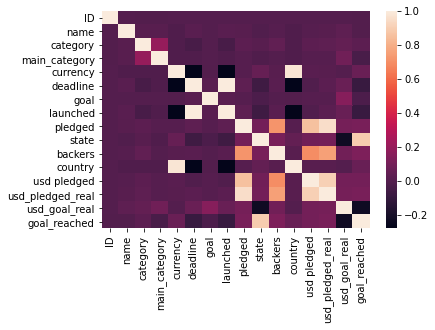

In [84]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Análisis de Variable de Salida

Los valores de proyectos que fueron exitoso en los datos originales son de alrededor del 35%, fracasados 52%  y otros 13%. Nuestros datos reflejan un resultado parecido sobre los montos de proyectos que lograron su objetivo, a los que llamamos **reached goal** y **didn't reach goal** en la table siguiente. 

Podems observar que evidentemente son más los proyectos que alcanzaron su objetivo a aquellos que no. 

<BarContainer object of 2 artists>

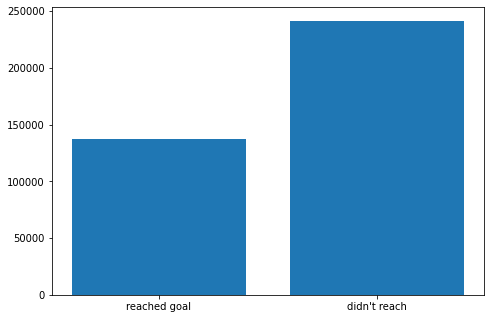

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["reached goal", "didn't reach"]
success_projects = data[data["goal_reached"]==1]
failed_projects = data[data["goal_reached"]==0]
projects = [success_projects.shape[0], failed_projects.shape[0]]
ax.bar(labels, projects)


# Successfull vs goal reached

Nuestra variable de salida en realidad tiene menos proyectos de éxito ya que en los datos originales, un proyecto puede ser exitoso sin necesidad de llegar a su objetivo monetario, con lo anterior se vuelve más complejo analizar sobre que parámetros se decide si un proyecto es éxito, fallido o otro. Por lo que nuestro modelo solo se enfocará en analizar si un proyecto llegó o no a su monto objetivo en dólares. 

<BarContainer object of 2 artists>

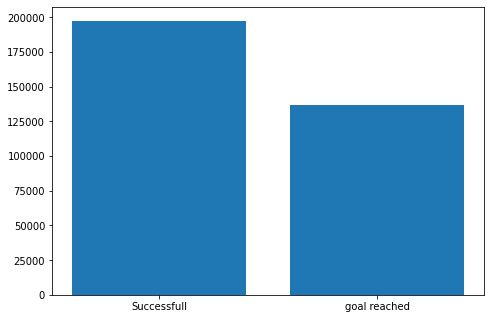

In [86]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["Successfull", "goal reached"]
success_projects = data[data["state"]==1]
goal_reached = data[data["goal_reached"]==1]
projects = [success_projects.shape[0], goal_reached.shape[0]]
ax.bar(labels, projects)

# Eliminación de Variables

LLevamos a cabo la eliminación de las variables mencionadas anteriormente para que nuestro modelo no vaya a tener errores. 

*   goal
*   backers
*   pledged
*   usd pledged
*   pledged
*   usd_pledged_real
*   ID


In [87]:
del data["goal"]
del data["backers"]
del data["pledged"]
del data["usd pledged"]
del data["ID"]
del data["usd_pledged_real"]
del data ["state"]

# Nueva Correlación

Podemos oberservar que la variable de salida tiene una correlación baja con las variables dependientes y por ende esto nos muestra que nuestro modelo tendrá una probabilidad más baja de arrojarnos falsos positivos. 

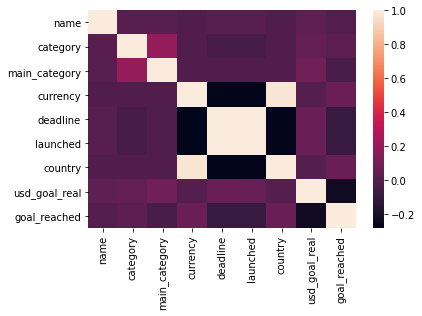

In [88]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Transoformaición Final

La siguiente tabla muestra la transformación final de nuestros datos. 

In [89]:
data.head()

,name,category,main_category,currency,deadline,launched,country,usd_goal_real,goal_reached
0,326290,108,12,5,735880,735821,9,7.977321,0
1,132984,93,6,13,736634,736574,22,11.605945,0
2,357882,93,6,13,734925,734880,22,12.119890,0
3,338194,90,10,13,734609,734579,22,9.390248,0
4,76586,55,6,13,735839,735783,22,11.065033,0


In [90]:
data.dtypes

name               int64
category           int64
main_category      int64
currency           int64
deadline           int64
launched           int64
country            int64
usd_goal_real    float64
goal_reached       int64
dtype: object

# Buscando Outliers

Al llevar un análisis de los datos podemso notas que muchas de nuestras variable no cuentan con outliers a excepción de **launched** y **usd_real_goal** por lo que llevamos a cabo una limpia de los valores. 

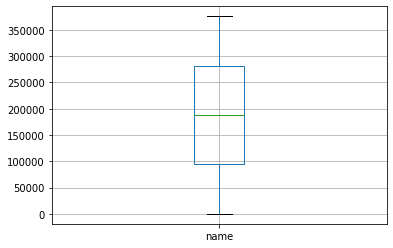

In [91]:
data.boxplot(column=["name"])

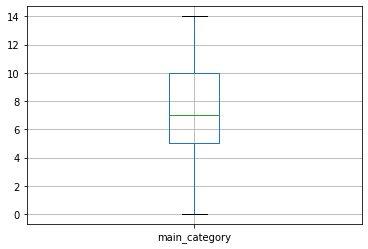

In [92]:
data.boxplot(column=["main_category"])

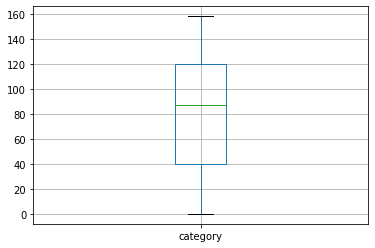

In [93]:
data.boxplot(column=["category"])

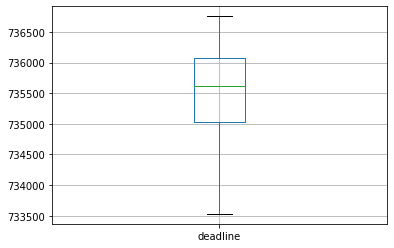

In [94]:
data.boxplot(column=["deadline"])

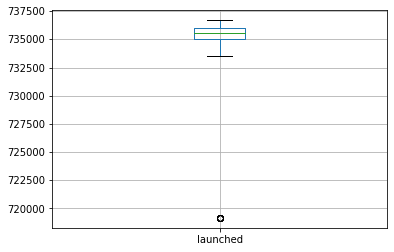

In [95]:
data.boxplot(column=["launched"])

(378654, 9)

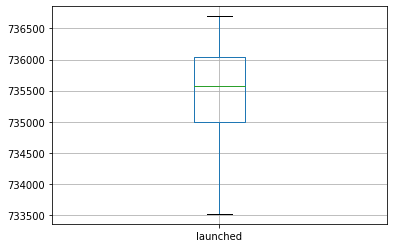

In [96]:
# Limpiamos valores que sean mayores a 73000
data = data[data["launched"] > 730000]
data.boxplot(column=["launched"])
data.shape 



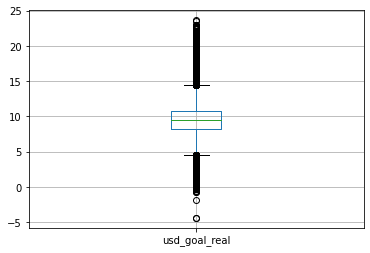

In [97]:
data.boxplot(column=["usd_goal_real"])

(364987, 9)

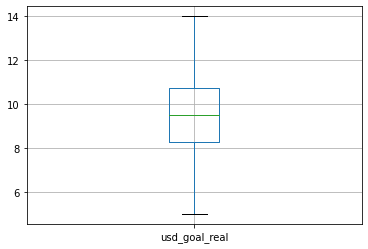

In [98]:

data = data[(data['usd_goal_real'] >= 5) & (data['usd_goal_real'] <= 14)]
data.boxplot(column=["usd_goal_real"])
data.shape

In [99]:
print(data.isna().sum()) 

name             0
category         0
main_category    0
currency         0
deadline         0
launched         0
country          0
usd_goal_real    0
goal_reached     0
dtype: int64


# Resultados

Al llevar a cabo la eliminación de outliers, nuestros datos se reducen a 364987, lo que es una reducción muy baja y también nos cersioramos de que no vayamos a tener ningún tipo de valores NA, que puedan hacer que nuestros modelos fallen. 

In [100]:
# Estableciendo X y Y

Y = data["goal_reached"]
X = data


# Modelo 1. MLP con Keras

Ya que tenemos nuestros datos limpios y tranformados, lo que sigue es llevar a cabo nuestro primer modelo que será una red nueronal multicapa (MLP)

In [101]:
X = data
print(X.shape)
X.drop("goal_reached", inplace=True, axis=1)
print(Y.shape)

(364987, 9)
(364987,)


In [102]:
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.5, shuffle=True,  random_state=None)

In [103]:
# Nuestra partición de entrenamiento
print(trainX.shape)
print(testX.shape)

(182493, 8)
(182494, 8)


In [104]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils import to_categorical
from matplotlib import pyplot

In [105]:
# Cambiamos los datos de salida a que sea categóricos y aceptables para el modelo
trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)
input_dim = trainX.shape[1]
nb_classes = trainY.shape[1]
print(nb_classes)

2


In [106]:
# Creamos nuestras capas ocultas y de calisifación
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [107]:
# Nuestro modelo tendrá una función de costo binary_crossentropy ya que sus variables de salida son 1 y 0
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy", 'mse', 'mae'])

In [108]:
print("Training...")
history = model.fit(trainX, trainY, epochs=300, batch_size=64, validation_split=0.2, verbose=2, validation_data=(testX, testY))


Training...
Epoch 1/300
2282/2282 - 4s - loss: 0.6292 - accuracy: 0.6463 - mse: 0.2197 - mae: 0.4382 - val_loss: 0.6212 - val_accuracy: 0.6537 - val_mse: 0.2162 - val_mae: 0.4349
Epoch 2/300
2282/2282 - 4s - loss: 0.6239 - accuracy: 0.6517 - mse: 0.2174 - mae: 0.4348 - val_loss: 0.6183 - val_accuracy: 0.6562 - val_mse: 0.2149 - val_mae: 0.4319
Epoch 3/300
2282/2282 - 4s - loss: 0.6210 - accuracy: 0.6540 - mse: 0.2161 - mae: 0.4323 - val_loss: 0.6158 - val_accuracy: 0.6617 - val_mse: 0.2137 - val_mae: 0.4324
Epoch 4/300
2282/2282 - 4s - loss: 0.6186 - accuracy: 0.6589 - mse: 0.2149 - mae: 0.4301 - val_loss: 0.6140 - val_accuracy: 0.6623 - val_mse: 0.2129 - val_mae: 0.4302
Epoch 5/300
2282/2282 - 4s - loss: 0.6166 - accuracy: 0.6599 - mse: 0.2140 - mae: 0.4283 - val_loss: 0.6114 - val_accuracy: 0.6660 - val_mse: 0.2117 - val_mae: 0.4275
Epoch 6/300
2282/2282 - 3s - loss: 0.6152 - accuracy: 0.6622 - mse: 0.2134 - mae: 0.4271 - val_loss: 0.6089 - val_accuracy: 0.6678 - val_mse: 0.2106 - va

# Errores a través del tiempo

Podemos ver que nuestros tres errores fueron bajando a través de las épocas donde el error medio cuadrado tiene el valor más bajo. 

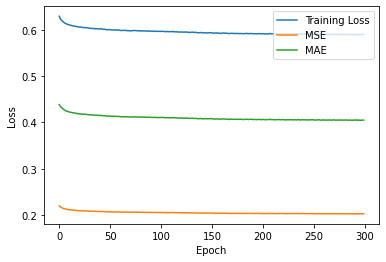

In [109]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['mse'])
pyplot.plot(history.history['mae'])
plt.legend(['Training Loss', 'MSE', 'MAE'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
pyplot.show()

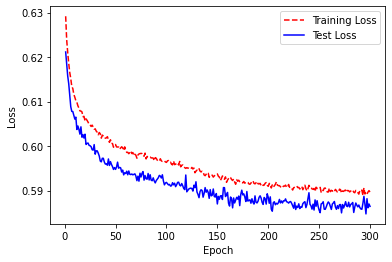

In [111]:
# Costo de entrenamiento y prueba 
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Historial de costo de entrenamiento y prueba 
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

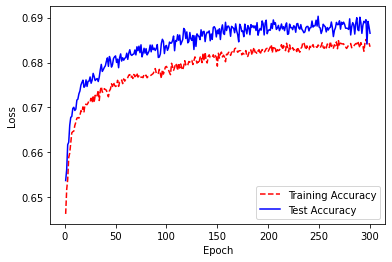

In [112]:
# Precisón de entrenamiento y prueba
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
epoch_count = range(1, len(training_accuracy) + 1)

# Historial de entrenamiento y prueba
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [116]:
y_pred = model.predict(testX)

In [117]:
print(classification_report(testY, np.round(y_pred), target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78    115961
           1       0.64      0.33      0.44     66533

   micro avg       0.69      0.69      0.69    182494
   macro avg       0.67      0.61      0.61    182494
weighted avg       0.68      0.69      0.66    182494
 samples avg       0.69      0.69      0.69    182494



# Resultados MLP

Podemos oberservar que el modelo nos da una precisón del casi 70%, lo cuál no es malo. Tambén los porcentajes de recall así como f1 son muy parecidas, lo que nos indica que hay buena constancia en los resultados de nuestro modelo.

Este modelo podría ser optimizado al correr más épocas y también llevar a cabo un menor monto de datos que ingresan a la red neuronal. 

# Transformación para modelos categóricos

Para nuestros siguientes modelos llevaremos a cabo una transformación de escala ya que esta transformación es la mejor para SVM, KNN, y Random forest debido a que un cambio numerico cuando los datos no son parecidos puede tener mucho impacto de forma negativa. 

In [41]:
data2 = pd.read_csv("/content/drive/MyDrive/ks-projects-201801.csv")
tdata = pd.read_csv("/content/drive/MyDrive/ks-projects-201801.csv")

In [42]:
data2["name"] = encoder.fit_transform(data2['name'].astype(str))
data2["main_category"] = encoder.fit_transform(data2["main_category"].astype(str))
data2["currency"] = encoder.fit_transform(data2["currency"].astype(str))
data2["state"] = encoder.fit_transform(data2["state"].astype(str))
data2["category"] = encoder.fit_transform(data2["category"].astype(str))
data2["country"] = encoder.fit_transform(data2["country"].astype(str))
data2["goal"] = minmax_scaling(data2["goal"], columns = [0])
data2['deadline'] = pd.to_datetime(data2['deadline'])
data2["goal_reached"] = data2["usd_pledged_real"] > data2["usd_goal_real"]
data2["usd_goal_real"] = minmax_scaling(data2["usd_pledged_real"], columns = [0])
data2["goal_reached"] = encoder.fit_transform(data2["goal_reached"].astype(bool))
data2['deadline']= data2['deadline'].map(dt.datetime.toordinal)
data2['launched'] = pd.to_datetime(data2['launched'])
data2['launched']= data2['launched'].map(dt.datetime.toordinal)

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


In [43]:
tdata["name"] = minmax_scaling(data2["name"], columns = [0])
tdata["main_category"] = minmax_scaling(data2["main_category"], columns = [0])
tdata["currency"] = minmax_scaling(data2["currency"], columns = [0])
tdata["category"] = minmax_scaling(data2["category"], columns = [0])
tdata["country"] = minmax_scaling(data2["country"], columns = [0])
tdata["goal"] = minmax_scaling(data2["goal"], columns = [0])
tdata["deadline"] = minmax_scaling(data2["deadline"], columns = [0])
tdata["usd_goal_real"] = data2["usd_goal_real"]
tdata["goal_reached"] = data2["goal_reached"]
tdata["launched"] = minmax_scaling(data2["launched"], columns = [0])
tdata["state"] = minmax_scaling(data2["state"], columns = [0])



/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


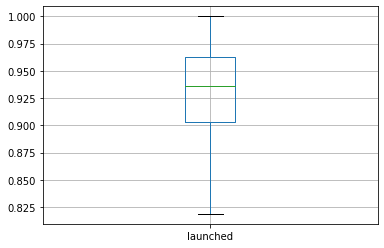

In [44]:
# Eliminando outliers
tdata = tdata[tdata["launched"] > 0.6]
tdata.boxplot(column=["launched"])

In [45]:
# Eliminadno variables dependientes
del tdata["goal"]
del tdata["backers"]
del tdata["pledged"]
del tdata["usd pledged"]
del tdata["ID"]
del tdata["usd_pledged_real"]
del tdata["state"]

In [46]:
Y = tdata["goal_reached"]
X = tdata
X.drop("goal_reached", inplace=True, axis=1)

In [47]:
X.head()

,name,category,main_category,currency,deadline,launched,country,usd_goal_real
0,0.868338,0.683544,0.857143,0.384615,0.728456,0.950094,0.409091,0.000000e+00
1,0.353903,0.588608,0.428571,1.000000,0.962182,0.993042,1.000000,1.190325e-04
2,0.952412,0.588608,0.428571,1.000000,0.432424,0.896424,1.000000,1.081666e-05
3,0.900017,0.569620,0.714286,1.000000,0.334470,0.879256,1.000000,4.916666e-08
4,0.203814,0.348101,0.428571,1.000000,0.715747,0.947927,1.000000,6.308082e-05


In [48]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: goal_reached, dtype: int64

In [49]:
Y.shape

(378654,)

In [50]:
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.4, shuffle=True,  random_state=None)

# Modelo 2. KNN

En este segundo modelo utilizamos KNN. Podemos observar que este modelo 

In [51]:
from sklearn import neighbors, linear_model

In [52]:
tdata.dtypes

name             float64
category         float64
main_category    float64
currency         float64
deadline         float64
launched         float64
country          float64
usd_goal_real    float64
dtype: object

In [53]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 7)
knn_model = knn.fit(trainX, trainY)
print('k-NN accuracy for test set: %f' % knn_model.score(testX, testY))

k-NN accuracy for test set: 0.643286


In [54]:
knn_predict = knn_model.predict(testX)
print(classification_report(testY, np.round(knn_predict), target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74    147629
           1       0.49      0.35      0.41     79564

    accuracy                           0.64    227193
   macro avg       0.59      0.58      0.58    227193
weighted avg       0.62      0.64      0.63    227193



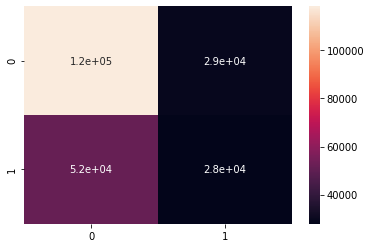

In [55]:
matriz = cm(testY,knn_predict)
sns.heatmap(matriz, annot=True)

# Resultados KNN

Podemos concluir que KNN nos da una precisión más baja. Es un modelo bueno para detectar los casos que no llegarón a la meta objetivo pero no tan bueno para pronosticar los casos de éxito. 

In [56]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.ensemble import BaggingClassifier

# Modelo 3. SVM 

En nuestro tercer modelo usaremos un máquina de vectores para llevar a cabo la clasificación de nuestros datos.Usar este modelo es más costoso en la cuestión del tiempo, pero en muchos casos logra obtener un mejor resultado que KNN y una red neuronal. Usaremso un kernel lineal y una clase especial BaggingClassifier para agilizar los tiempos del modelo sin perjudicar tanto su efectividad. 

In [57]:

from sklearn import svm


n_estimators = 10

svm_model = BaggingClassifier(svm.SVC(kernel='linear', probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators)

svm_best_model = svm_model.fit(trainX,np.array(trainY).reshape(trainY.shape[0],1))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:

pred = np.array(svm_best_model.predict(testX))

recall_svm = rs(testY,pred)
precision_svm = ps(testY,pred)
# f1_svm = fs(testY,pred)
ma_svm = svm_best_model.score(testX,testY)

In [59]:
print(classification_report(testY, np.round(pred), target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85    147629
           1       0.82      0.52      0.64     79564

    accuracy                           0.79    227193
   macro avg       0.80      0.73      0.75    227193
weighted avg       0.80      0.79      0.78    227193



In [60]:
print("Accuracy: ", ma_svm)

Accuracy:  0.7924627959488189


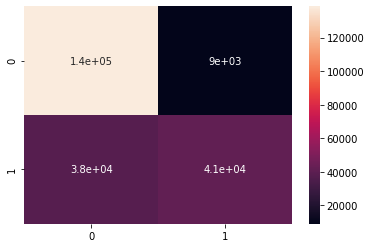

In [61]:
matriz = cm(testY,pred)
sns.heatmap(matriz, annot=True)

# Resultados SVM

Como podemos observar, evidentemente la máquina de vectores logra una mejor prediccón de nuestros datos. Su precisión, recall y f1 es más alta en la cantidad de datos que se llevo a cabo, incluso con una partición de entrenamiento más baja que la de nuestra red nueronal. Podemos notar en nuestra matriz de confución qeu este modelo es excelente pronosticando los casos en los que un proyecto no es éxito pero también es mucho mejor que los dos modelos anteriores para poder pronosticar los casos de éxito. 

Este modelo incremente en un 10% a comparación de nuestro mejor modelo anterior que fue la red neuronal. 

# Modelo 4. Random Forest con RandomizedSearch

Para el siguiente modelo llevaremos a cabo un análisis utilizando varios hiperparámetros, de esta forma podremos obtener el mejor modelo en base a diferentes métricas. 

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

bootstrap = [True, False]
ccp_alpha = ccp_alpha = [0, 3, 7, 13, 17]
criterion = ['gini', 'entropy']
max_depth = [6]
min_samples_split = [6]
min_samples_leaf = [6]
n_estimators = [10, 20, 50, 70, 100, 125, 150]

oob_score = [True, False]
hyperparameters = dict( bootstrap=bootstrap, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, 
                       n_estimators=n_estimators, oob_score=oob_score, ccp_alpha=ccp_alpha )

rf_model = RandomizedSearchCV(rf_model, hyperparameters, cv=5, scoring='accuracy')
rf_best_model = rf_model.fit(trainX,trainY)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarni

In [64]:
print("Random Forest", rf_best_model.score(trainX,trainY))
proba = rf_best_model.predict(testX)

Random Forest 0.8309003637900185


In [65]:
print(classification_report(testY, np.round(proba), target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    147629
           1       0.78      0.71      0.75     79564

    accuracy                           0.83    227193
   macro avg       0.82      0.80      0.81    227193
weighted avg       0.83      0.83      0.83    227193



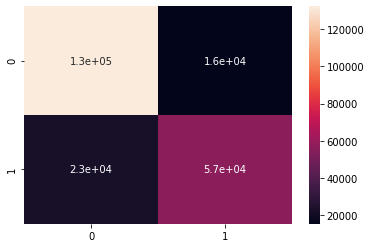

In [66]:
matriz = cm(testY,proba)
sns.heatmap(matriz, annot=True)

In [67]:
print("Mejores variables Random Forest\n")

print('Bootstrap =>          ', rf_best_model.best_estimator_.get_params()['bootstrap'])
print('ccp_alpha =>    ', rf_best_model.best_estimator_.get_params()['ccp_alpha'])
print('Criterion =>    ', rf_best_model.best_estimator_.get_params()['criterion'])
print('Estimator =>    ', rf_best_model.best_estimator_.get_params()['n_estimators'])
print('OOB Scroe =>    ', rf_best_model.best_estimator_.get_params()['oob_score'])

Mejores variables Random Forest

Bootstrap =>           False
ccp_alpha =>     0
Criterion =>     gini
Estimator =>     125
OOB Scroe =>     False


# Resultados Random Forest

Podemos observar con los datos anteriores que RF es el mejor modelo hasta el momento. En la matriz de confución de observa que los montos en los que pronostica de forma incorrecta la catogoría 1 y 0 es muy baja. También su niveles de precisión, recall y f1 son mucho mayores a los otros modelos que hemos analizado. 

El importante obersvar que en este caso el no utilizar Bootstrap como OOB score llevó a mejores resultados. Así como la selección de gini como criterio y una estimación con 125 unidades. 

# Modelo 5. Boosted Random Forest

Nuestro último modelo será un boosted random forest donde utilizaremos los parámetros de Boostrap y OOB Score como verdaderos y así com oentropía. 

El BRF tiene como objetivo reducir el over fitting de los modelos usando un bagging, como lo llevamos a cabo con el SVM y que nos dió buenos resultados. 

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [69]:
brf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,min_samples_leaf=6, min_samples_split=6,
                       criterion='entropy', max_depth=6, oob_score=True )
brf = AdaBoostClassifier(brf,50,0.01,'SAMME.R',10)
brf_best_model = brf.fit(trainX, trainY)

In [70]:
pred = np.array(brf_best_model.predict(testX))

brf_recall = rs(testY,pred)
brf_precision = ps(testY,pred)
brf_f1 = fs(testY,pred)
brf_ma = brf_best_model.score(testX,testY)

In [71]:
print("Boosted Random Forest", brf_ma)


Boosted Random Forest 0.8395725220407319


In [72]:
print(classification_report(testY, np.round(pred), target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88    147629
           1       0.77      0.77      0.77     79564

    accuracy                           0.84    227193
   macro avg       0.82      0.82      0.82    227193
weighted avg       0.84      0.84      0.84    227193



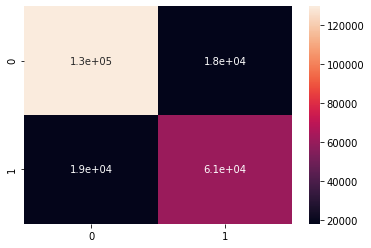

In [73]:
matriz = cm(testY,pred)
sns.heatmap(matriz, annot=True)

# Resultados Boosted Random Forest

Podemos observar que el BRF es el mejor de todos nuestros modelos, los casos en lo que se equivoca en los pronósticos son muy bajos y la precisión, recall y f1 es mucho más costante tanto en los casos cuando la variable de salida es 1 o 0. 

Los tiempos de ejecución también fueron muy bajos en BRF y RF a comparación de otros modelos, lo que los vuelve también más atractivos para el caso de que se necesite llevar a cabo más análisi con diferentes hiperparámetros. 





## Mejor Modelo
El mejor de los modelos sin duda es el Boosted Random Forest, este modelo nos da una precisión de 84% lo que es mucho mayor a la KNN 64% y el MLP 70%. De todos los modelos, este es el que más constancia tiene en sus métricas y del que nos podemos basar para poder hacer mejor pronósticos. 

## Furutos Análisis
 No podemos decir que con estos modelos se resuelve en su totalidad el análisis de esta base de datos, sino que da más oportuninida para llevar a cabo más afinaciones tanto de el Boosted y Random Forest, así como la máquina de vectores, que son los modelos que mejor resultados obtuvieron. 

 Creo que también llevar a cabo una Randomized Search con SVM es una gran opción, el problema es que para la entrega y tiempos de este proyecto, así como la capacidad computacional de Google Colab, no fue posible llevar a cabo los tiempos computacionales que requieren este tipo de análisis. 

 Como futuro, el tener una mejor capacidad y tiempo de compúto puede resultar en obtener mucho mejores modelos. 



# Conclusiones

El análisis anterior fue un gran ejercicio para poner en práctica modelos con datos de una plataforma muy moderna y con datos muy actualzidos. Personalmente no me había tocado llevar a cabo un análisis donde tuviera que transformar los datos para poder lograr el objetivo esperado y eso fue un reto muy gratificante. 

Creo que todavía tiene mucho potencial de mejora este proyecto. Se podría comparar con los datos de años anteriores para analizar de mejor forma aún su precisión y resultados. 